In [2]:
from __future__ import division
from __future__ import print_function
from sklearn.ensemble import IsolationForest

import os
import sys
from time import time

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

import pandas as pd
import numpy as np
from numpy import percentile
from sklearn.metrics import average_precision_score
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.font_manager

In [3]:
# Define the number of inliers and outliers
n_samples = 256
outliers_fraction = 0.25
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

In [4]:
random_state = np.random.RandomState(42)
# Define nine outlier detection tools to be compared
classifiers = {
    'Isolation Forest': IsolationForest(contamination=outliers_fraction,
                                random_state=random_state)
}

[0.0319119849265194, 0.031940835101514686, 0.03145295602277559, 0.03183829967354975, 0.03215178156503484, 0.03226820771355199, 0.03089708141343291, 0.03268547148444393, 0.031647130637140926, 0.030801884575635152]


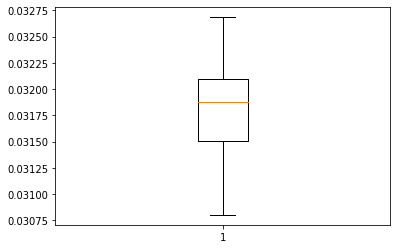

In [11]:
# Fit the models with the generated data and 
# compare model performances
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    #X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    #X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    #X = np.r_[X1, X2]
    # Add outliers
    #X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]
    data = scipy.io.loadmat('C:\\Users\\anton\\OneDrive\\Skrivbord\\Thesis_Code\\IsolationForestTinyML\\DatSets\\glass.mat',
                        squeeze_me=False)

    enlist = list(data.items())
    X = np.array(enlist, dtype=object)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 1)

    y_true = np.empty([1,0], dtype=int)

    #print(X[1][0][0])
    k = 0
    while k < len(X[1][0]):
        y_true = np.append(y_true, int(X[1][0][k]))
        k += 1

    X = X[0][0]
    # Fit the model
    #plt.figure(figsize=(15, 12))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        #print(i + 1, 'fitting', clf_name)
        # fit the data and tag outliers
        p = 0
        aps = []
        while p < 10:
            clf.fit(X)
            #WARNING put +1
            scores_pred = clf.decision_function(X) * 1 
            threshold = percentile(scores_pred, 100 * outliers_fraction)
            y_pred = clf.predict(X) * -1
            y_pred = (y_pred + 1) / 2
            aps.append(average_precision_score(y_true, scores_pred))
            p += 1
        #n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points
        #WARNING +1
        #Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * 1
        #Z = Z.reshape(xx.shape)
        #plt.figure(figsize=[10,10])
        #subplot = plt.subplot(2, 2, 1)
        #subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
        #                 cmap=plt.cm.Blues_r)
        #a = subplot.contour(xx, yy, Z, levels=[-threshold],
        #                    linewidths=2, colors='red')
        #subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
        #                 colors='orange')
        #b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
        #                    s=20, edgecolor='k')
        #c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
        #                    s=20, edgecolor='k')
        #subplot.axis('tight')
        #subplot.legend(
         #   [a.collections[0], b, c],
        #    ['learned decision function', 'true inliers', 'true outliers'],
          #  prop=matplotlib.font_manager.FontProperties(size=10),
          #  loc='lower right')
        #subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        #subplot.set_xlim((-7, 7))
        #subplot.set_ylim((-7, 7))
    #plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    #plt.suptitle("Outlier detection")
#plt.show()
plt.boxplot(aps)
print(aps)